<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [9]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


1______________________________________________________________________________________________________________________________

In [90]:
# se crea el dataframe con las variables numerica

numericas=['year','desplazamiento','cilindros','co2','consumo_litros_milla']
numeros_df = df[numericas]
# se crea el dataframe de las variables caetgóricas, quitando las numéricas
categorias_df =df.drop(numeros_df, axis=1)

# se reemplazan los valores na por la media de la muestra iterando el dataframe por columnas
scaler=MinMaxScaler()
for col in numeros_df:
    numeros_df[col] = numeros_df[col].fillna(numeros_df.mean()[col])
    
numeros_df[numericas] = scaler.fit_transform(numeros_df[numericas]) 

C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


2______________________________________________________________________________________________________________________________

In [78]:
# se creó el data frame de variables categóricas enteriormente aprovechando la creación del numérico

# esta función crea una columna por cada categoría que tenga en cada columna, luego, le asigna 1 y 0 según
# si la variable pertenece a esa categoría o no. En este caso, para el tipo de combustible la columna "combustible_tipo"
# tiene a lo menos 2 elementos Premium y Normal, por lo tanto se genera la columna combustible_tipo Premium, y otra para 
# el tipo normal, luego le asigna 1 en combustible:tipo premium si es premiun y 0 sino, el caso análogo para todas las demás


categorias_df_dummy = pd.get_dummies(categorias_df)
categorias_df_dummy

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


3______________________________________________________________________________________________________________________________

In [92]:
# se juntan los dataframes respectivos mediante el comnado .join

df_procesado=numeros_df.join(categorias_df_dummy)  
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

1______________________________________________________________________________________________________________________________

In [97]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(df_procesado)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

2______________________________________________________________________________________________________________________________

In [101]:
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=df_procesado.columns)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]
centroids_df

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.448431,0.237242,0.176928,0.304081,0.225937,0.090837,0.106142,0.041145,0.151858,0.357384,...,9.775393e-01,2.220446e-15,-2.747802e-15,2.246074e-02,-8.326673e-16,9.888690e-01,1.033592e-02,-2.109424e-15,7.950706e-04,1
1,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,2.192690e-15,1.168452e-02,9.571568e-01,-3.969047e-15,1.703992e-03,7.216450e-16,4.868549e-04,9.978092e-01,7.494005e-16,2
2,0.586260,0.362143,0.299692,0.354258,0.282449,0.001521,0.083904,0.086946,0.190875,0.559442,...,2.179975e-02,9.776933e-01,-2.609024e-15,-4.246603e-15,2.332066e-02,6.938894e-16,9.766793e-01,-2.914335e-15,2.331468e-15,3
3,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,3.080869e-15,5.599473e-03,9.367589e-01,-3.164136e-15,-3.053113e-16,6.938894e-16,2.942091e-15,1.000000e+00,2.026157e-15,4
4,0.569233,0.169641,0.146068,0.240929,0.156410,0.007970,0.117655,0.017560,0.139268,0.627854,...,2.164935e-15,1.350804e-04,-1.776357e-15,9.998649e-01,-1.720846e-15,3.782250e-03,8.104822e-04,-2.803313e-15,9.954073e-01,5
5,0.476852,0.450916,0.327240,0.409956,0.343253,0.304255,0.017105,0.041480,0.048535,0.150951,...,4.163336e-15,4.062433e-02,8.552491e-04,-4.246603e-15,9.950823e-01,6.414368e-04,6.414368e-04,3.634809e-03,2.386980e-15,6
6,0.408185,0.334017,0.258234,0.354260,0.281327,0.178115,0.084047,0.093583,0.135930,0.182156,...,3.006304e-02,9.646032e-01,-3.275158e-15,5.333764e-03,1.454663e-03,6.465169e-04,9.978988e-01,-3.747003e-15,2.581269e-15,7
7,0.696694,0.278905,0.234015,0.304836,0.227465,0.002080,0.070715,0.053661,0.153910,0.637687,...,9.559068e-01,7.771561e-16,-1.026956e-15,4.409318e-02,5.273559e-16,9.858569e-01,1.164725e-02,2.498002e-16,2.495840e-03,8


3______________________________________________________________________________________________________________________________

In [114]:
for i in range(1,9):
    print("_____moda  cluster ",i,"_____")
    print(df_procesado[df_procesado['cluster']==i-1][numericas].mode())
    print('- - - - - - - - - - - - - - - - - ')
    print("_____promedio cluster ",i,"_____")
    print(df_procesado[df_procesado['cluster']==i-1][numericas].mean())
    print('______________________________________________________________________')

_____moda  cluster  1 _____
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0   0.0        0.179487   0.142857  0.317749               0.24183
- - - - - - - - - - - - - - - - - 
_____promedio cluster  1 _____
year                    0.448431
desplazamiento          0.237242
cilindros               0.176928
co2                     0.304081
consumo_litros_milla    0.225937
dtype: float64
______________________________________________________________________
_____moda  cluster  2 _____
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0   0.0        0.564103   0.428571  0.454199              0.393464
- - - - - - - - - - - - - - - - - 
_____promedio cluster  2 _____
year                    0.384236
desplazamiento          0.585590
cilindros               0.430797
co2                     0.510289
consumo_litros_milla    0.454503
dtype: float64
______________________________________________________________________
_____moda  cluster  3 _____
       year  d

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [118]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,127461.299907
1,10,83446.155076
2,20,66922.439955
3,30,56872.345491
4,50,45811.844791


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

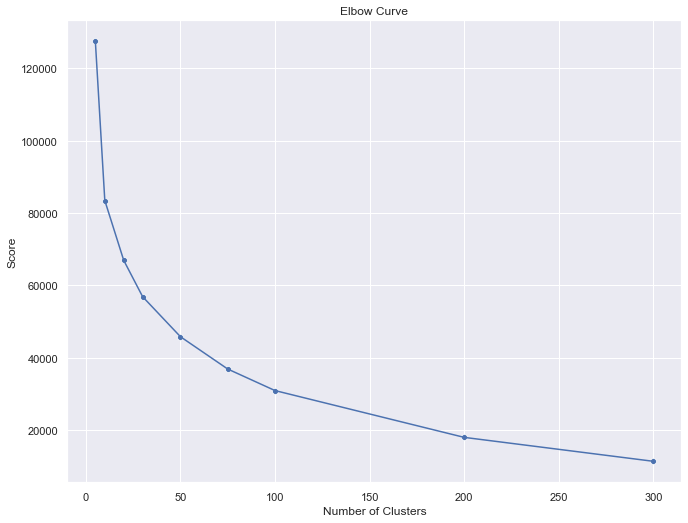

In [120]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
# del gráfico se ve que a partir de 100 clusters ya no hay una mejora muy sustancial